In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16}) 

import h5py
import numpy as np

from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [2]:
import os

In [ ]:
import phenom
import numpy as np

In [4]:
import puck

In [5]:
from ansatz import dphimrd_func

In [6]:
# wf = puck.Waveform(filename='data/q4a08t90dPm1D_T_96_384.h5')
# wf = puck.Waveform(filename='data/q8a08t90dP0_T_96_384.h5')
wf = puck.Waveform(filename='data/q8a08t150dP2_T_120_480.h5')

# wf = puck.Waveform(filename='data/q8a08t120dP2_r03_T_96_360.h5')

In [7]:
wf.info

simname: q8a08t150dP2_T_120_480
filename: data/q8a08t150dP2_T_120_480.h5
eta: 0.09876544444344446
X1: [-9.84770606e-08 -3.96532060e-01 -6.94794516e-01]
X2: [0. 0. 0.]
chip: 0.39653206013189735
estimated remnant from fits:
final mass: 0.992384
assuming non-precessing:
(non-prec) final spin: -0.199677
(non-prec) ringdown freq: 0.056306
(non-prec) ringdown damp: 0.014303
estimated using PhenomP final spin:
(prec) final spin: -0.371529
(prec) ringdown freq: 0.053711
(prec) ringdown damp: 0.014298


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


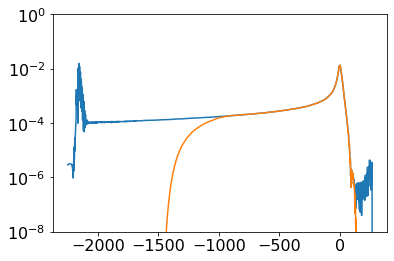

In [8]:
wf.compute_fft(t12=[-1500, -800], t34=[100, 150], plot=True, take_pos_f=True, f_min=0.018, f_max=0.12)
# wf.compute_fft(t12=[-1000, -500], t34=[100, 101], plot=True, take_pos_f=True, f_min=0.01, f_max=0.3)

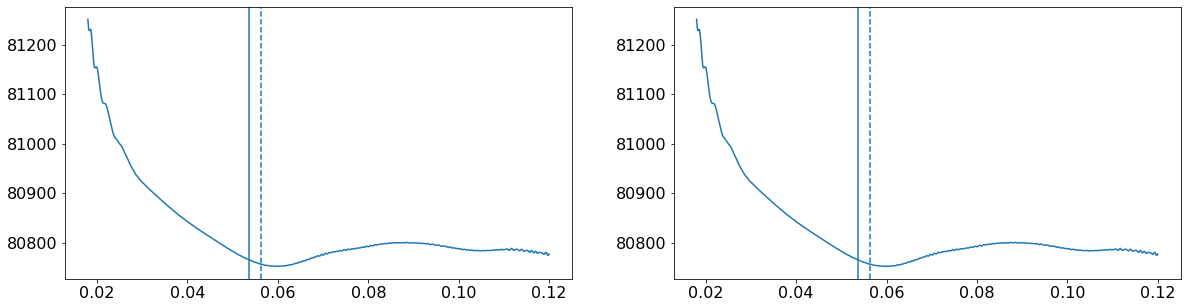

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
axes[0].plot(wf.fd['freqs'], wf.fd['psi4']['dphase'])
axes[1].plot(wf.fd['freqs'], wf.fd['strain']['dphase'])
# for ax in axes:
#     ax.set_xlim(*xlim)

axes[0].axvline(wf.fring)
axes[1].axvline(wf.fring)


axes[0].axvline(wf.fring_non_prec, ls='--')
axes[1].axvline(wf.fring_non_prec, ls='--')


Text(0.5, 1.0, 'q8a08t150dP2_T_120_480')

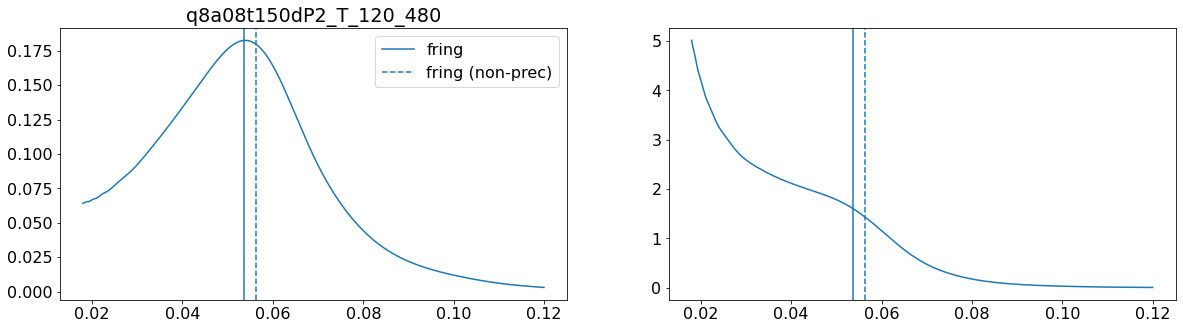

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
axes[0].plot(wf.fd['freqs'], wf.fd['psi4']['amp'])
axes[1].plot(wf.fd['freqs'], wf.fd['strain']['amp'])
# for ax in axes:
#     ax.set_xlim(*xlim)

axes[0].axvline(wf.fring, label='fring')
axes[1].axvline(wf.fring)


axes[0].axvline(wf.fring_non_prec, ls='--', label='fring (non-prec)')
axes[1].axvline(wf.fring_non_prec, ls='--')

axes[0].legend()
axes[0].set_title(wf.simname)

In [11]:
np.argmax(wf.fd['psi4']['amp'])

995

In [12]:
wf.fd['freqs'][995]

0.05393669295434913

In [13]:
wf.info

simname: q8a08t150dP2_T_120_480
filename: data/q8a08t150dP2_T_120_480.h5
eta: 0.09876544444344446
X1: [-9.84770606e-08 -3.96532060e-01 -6.94794516e-01]
X2: [0. 0. 0.]
chip: 0.39653206013189735
estimated remnant from fits:
final mass: 0.992384
assuming non-precessing:
(non-prec) final spin: -0.199677
(non-prec) ringdown freq: 0.056306
(non-prec) ringdown damp: 0.014303
estimated using PhenomP final spin:
(prec) final spin: -0.371529
(prec) ringdown freq: 0.053711
(prec) ringdown damp: 0.014298


# loop over cases

In [14]:
import glob

In [30]:
simfiles = glob.glob("data/*.h5")

In [31]:
simfiles

['data/q4a08t90dPm1D_T_96_384.h5',
 'data/q2a04t30dPm2_T_96_408.h5',
 'data/q8a08t90dP0_T_96_384.h5',
 'data/q4a04t90_T_96_360.h5',
 'data/q2_a10_a28_ph0_th120.h5',
 'data/q8a04t150dP9_T_96_360.h5',
 'data/q4a08t60dPm3dRm250_T_96_384.h5',
 'data/q2_a10_a28_ph0_th30.h5',
 'data/q2a04t120_T_96_408.h5',
 'data/q4a04t60dPm1.5D_T_96_360.h5',
 'data/q2a04t150_T_96_408.h5',
 'data/q4a08t30dPm5p5dRm47_T_96_360.h5',
 'data/q1a08t30dPm25_T_96_408.h5',
 'data/q2_a10_a28_ph0_th60.h5',
 'data/q8a08t120dP2_r03_T_96_360.h5',
 'data/q2a04t60dPm1_T_96_408.h5',
 'data/q4a08t120dP1_T_96_360.h5',
 'data/q1a08t150dP0_T_96_408.h5',
 'data/q1a08t60dPm1.5_T_96_408.h5',
 'data/q8a08t30dPm9.35_r0.5_T_96_360.h5',
 'data/q8a04t90dP0_T_96_360.h5',
 'data/q1a04t90_dP0_T_96_552.h5',
 'data/q8a08t60Ditm45dr075_96_360.h5',
 'data/q8a04t30dPm3_T_96_360.h5',
 'data/q8a04t120dPp1_T_96_360.h5',
 'data/q4a04t150_T_96_360.h5',
 'data/q4a04t30_T_96_360.h5',
 'data/q1a04t60_dPm1_T_96_552.h5',
 'data/q2_a10_a28_ph0_th150.h5',


In [32]:
def main(simfile):
    wf = puck.Waveform(filename=simfile)
    wf.info
    wf.compute_fft(t12=[-1500, -800], t34=[100, 150], plot=True, take_pos_f=True, f_min=0.018, f_max=0.12)
    
    peak_from_data = wf.fd['freqs'][np.argmax(wf.fd['psi4']['amp'])]
    
    d_peak_np = np.abs(peak_from_data - wf.fring_non_prec)
    d_peak_prec = np.abs(peak_from_data - wf.fring)
    
#     if np.max([d_peak_np, d_peak_prec]) > 0.01:
    if d_peak_prec > 0.01:
        fig, axes = plt.subplots(1, 2, figsize=(20,5))
        axes[0].plot(wf.fd['freqs'], wf.fd['psi4']['dphase'])
        axes[1].plot(wf.fd['freqs'], wf.fd['strain']['dphase'])
        # for ax in axes:
        #     ax.set_xlim(*xlim)

        axes[0].axvline(wf.fring)
        axes[1].axvline(wf.fring)


        axes[0].axvline(wf.fring_non_prec, ls='--')
        axes[1].axvline(wf.fring_non_prec, ls='--')
        fig, axes = plt.subplots(1, 2, figsize=(20,5))
        axes[0].plot(wf.fd['freqs'], wf.fd['psi4']['amp'])
        axes[1].plot(wf.fd['freqs'], wf.fd['strain']['amp'])
        # for ax in axes:
        #     ax.set_xlim(*xlim)

        axes[0].axvline(wf.fring, label='fring')
        axes[1].axvline(wf.fring)


        axes[0].axvline(wf.fring_non_prec, ls='--', label='fring (non-prec)')
        axes[1].axvline(wf.fring_non_prec, ls='--')

        axes[0].legend()
        axes[0].set_title(wf.simname)
        plt.show()
        plt.close()

simname: q4a08t90dPm1D_T_96_384
filename: data/q4a08t90dPm1D_T_96_384.h5
eta: 0.16000039999600005
X1: [ 6.22376820e-06  7.99961251e-01 -5.54112597e-03]
X2: [0. 0. 0.]
chip: 0.7999612508679456
estimated remnant from fits:
final mass: 0.977978
assuming non-precessing:
(non-prec) final spin: 0.468521
(non-prec) ringdown freq: 0.074204
(non-prec) ringdown damp: 0.014009
estimated using PhenomP final spin:
(prec) final spin: 0.693995
(prec) ringdown freq: 0.086244
(prec) ringdown damp: 0.013185


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


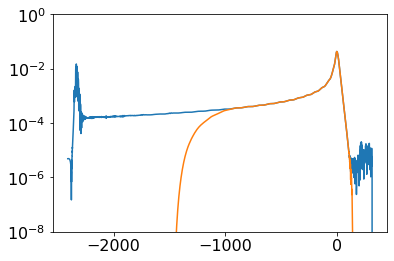

simname: q2a04t30dPm2_T_96_408
filename: data/q2a04t30dPm2_T_96_408.h5
eta: 0.22222277777233335
X1: [6.95701340e-07 2.00234721e-01 3.46264768e-01]
X2: [0. 0. 0.]
chip: 0.20023472052344748
estimated remnant from fits:
final mass: 0.953801
assuming non-precessing:
(non-prec) final spin: 0.727834
(non-prec) ringdown freq: 0.091035
(non-prec) ringdown damp: 0.013291
estimated using PhenomP final spin:
(prec) final spin: 0.733254
(prec) ringdown freq: 0.091481
(prec) ringdown damp: 0.01325


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


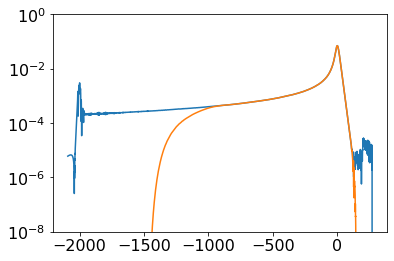

simname: q8a08t90dP0_T_96_384
filename: data/q8a08t90dP0_T_96_384.h5
eta: 0.09876544444344446
X1: [-9.61008561e-10 -7.99938870e-01 -8.65546248e-03]
X2: [0. 0. 0.]
chip: 0.7999388697990187
estimated remnant from fits:
final mass: 0.989467
assuming non-precessing:
(non-prec) final spin: 0.300627
(non-prec) ringdown freq: 0.067499
(non-prec) ringdown damp: 0.01411
estimated using PhenomP final spin:
(prec) final spin: 0.699903
(prec) ringdown freq: 0.085661
(prec) ringdown damp: 0.012996


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


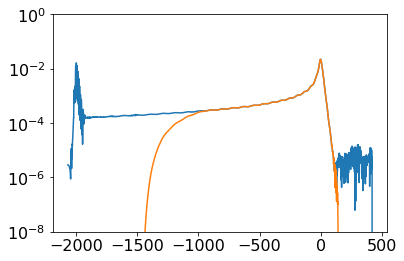

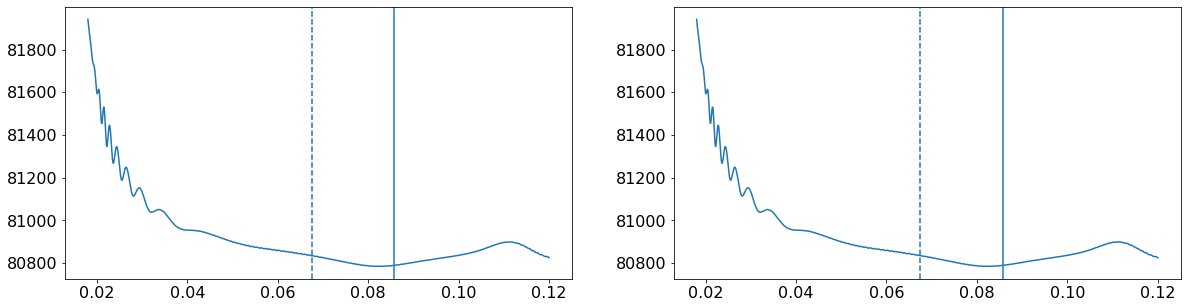

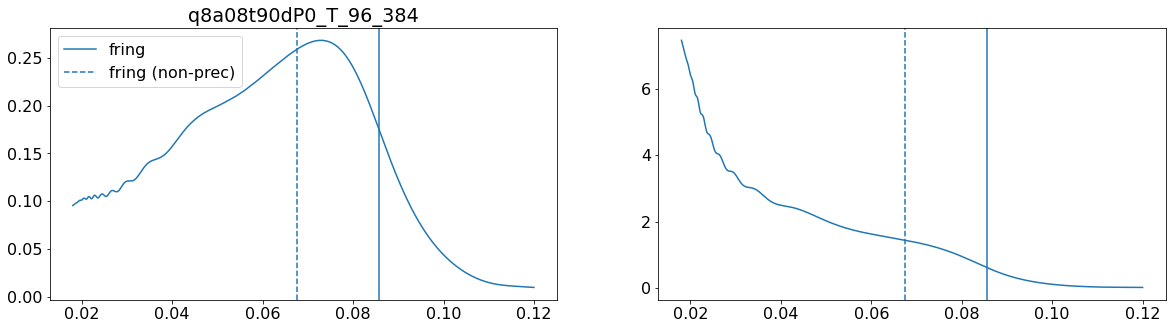

simname: q4a04t90_T_96_360
filename: data/q4a04t90_T_96_360.h5
eta: 0.160000199999
X1: [-3.25671837e-10  3.99991875e-01 -1.37066453e-03]
X2: [0. 0. 0.]
chip: 0.3999918750859368
estimated remnant from fits:
final mass: 0.977926
assuming non-precessing:
(non-prec) final spin: 0.470755
(non-prec) ringdown freq: 0.074299
(non-prec) ringdown damp: 0.014005
estimated using PhenomP final spin:
(prec) final spin: 0.535858
(prec) ringdown freq: 0.077156
(prec) ringdown damp: 0.013843


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


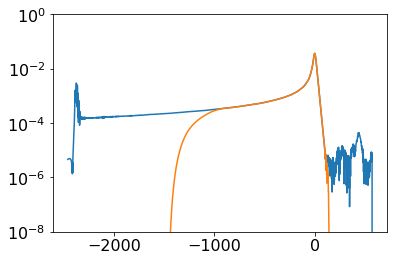

simname: q2_a10_a28_ph0_th120
filename: data/q2_a10_a28_ph0_th120.h5
eta: 0.22222311110000012
X1: [ 2.49834707e-08  6.91486638e-01 -4.02256291e-01]
X2: [0. 0. 0.]
chip: 0.6914866382385984
estimated remnant from fits:
final mass: 0.967139
assuming non-precessing:
(non-prec) final spin: 0.497551
(non-prec) ringdown freq: 0.07627
(non-prec) ringdown damp: 0.014099
estimated using PhenomP final spin:
(prec) final spin: 0.584812
(prec) ringdown freq: 0.080478
(prec) ringdown damp: 0.013841


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


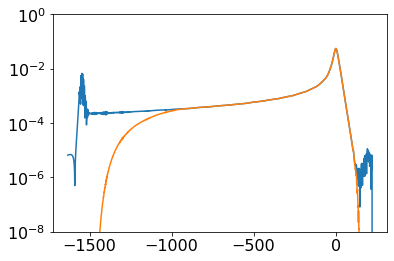

simname: q8a04t150dP9_T_96_360
filename: data/q8a04t150dP9_T_96_360.h5
eta: 0.09876538271585186
X1: [ 0.00113468 -0.19910167 -0.34692211]
X2: [0. 0. 0.]
chip: 0.1991049020086818
estimated remnant from fits:
final mass: 0.991198
assuming non-precessing:
(non-prec) final spin: 0.051596
(non-prec) ringdown freq: 0.061073
(non-prec) ringdown damp: 0.014266
estimated using PhenomP final spin:
(prec) final spin: 0.165562
(prec) ringdown freq: 0.063699
(prec) ringdown damp: 0.014205


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


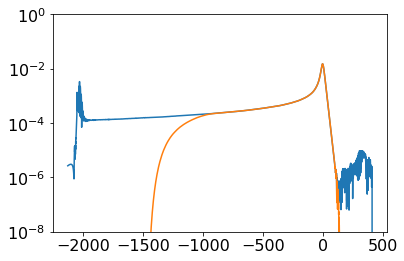

simname: q4a08t60dPm3dRm250_T_96_384
filename: data/q4a08t60dPm3dRm250_T_96_384.h5
eta: 0.16000039999600005
X1: [4.13615418e-07 6.95257618e-01 3.95707501e-01]
X2: [0. 0. 0.]
chip: 0.6952576184510277
estimated remnant from fits:
final mass: 0.971233
assuming non-precessing:
(non-prec) final spin: 0.678884
(non-prec) ringdown freq: 0.085787
(non-prec) ringdown damp: 0.013364
estimated using PhenomP final spin:
(prec) final spin: 0.811712
(prec) ringdown freq: 0.097306
(prec) ringdown damp: 0.012253


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


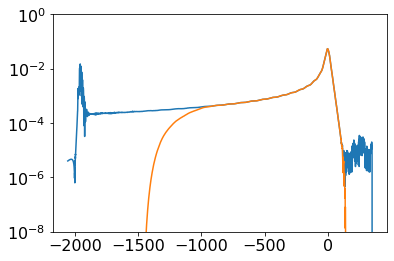

simname: q2_a10_a28_ph0_th30
filename: data/q2_a10_a28_ph0_th30.h5
eta: 0.22222311110000012
X1: [ 1.65384069e-07 -4.01148018e-01  6.92129462e-01]
X2: [0. 0. 0.]
chip: 0.40114801777691134
estimated remnant from fits:
final mass: 0.942306
assuming non-precessing:
(non-prec) final spin: 0.825328
(non-prec) ringdown freq: 0.101917
(non-prec) ringdown damp: 0.012445
estimated using PhenomP final spin:
(prec) final spin: 0.844365
(prec) ringdown freq: 0.104383
(prec) ringdown damp: 0.012154


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


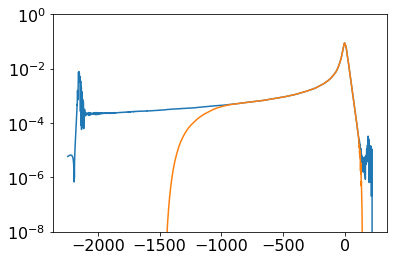

simname: q2a04t120_T_96_408
filename: data/q2a04t120_T_96_408.h5
eta: 0.22222277777233335
X1: [-8.19510451e-08 -3.46101924e-01 -2.00517300e-01]
X2: [0. 0. 0.]
chip: 0.34610192403221746
estimated remnant from fits:
final mass: 0.964455
assuming non-precessing:
(non-prec) final spin: 0.561212
(non-prec) ringdown freq: 0.079477
(non-prec) ringdown damp: 0.013959
estimated using PhenomP final spin:
(prec) final spin: 0.581911
(prec) ringdown freq: 0.080548
(prec) ringdown damp: 0.013889


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


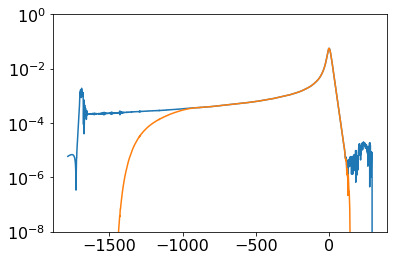

simname: q4a04t60dPm1.5D_T_96_360
filename: data/q4a04t60dPm1.5D_T_96_360.h5
eta: 0.160000199999
X1: [1.07262032e-07 3.47028475e-01 1.98914537e-01]
X2: [0. 0. 0.]
chip: 0.347028474630528
estimated remnant from fits:
final mass: 0.975071
assuming non-precessing:
(non-prec) final spin: 0.577178
(non-prec) ringdown freq: 0.079424
(non-prec) ringdown damp: 0.013754
estimated using PhenomP final spin:
(prec) final spin: 0.618436
(prec) ringdown freq: 0.081674
(prec) ringdown damp: 0.0136


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


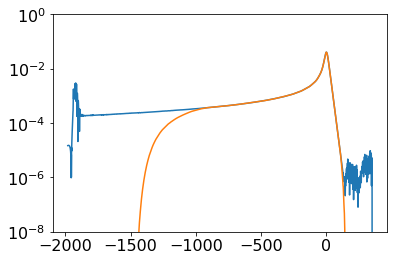

simname: q2a04t150_T_96_408
filename: data/q2a04t150_T_96_408.h5
eta: 0.22222277777233335
X1: [ 8.99653922e-07  1.99614857e-01 -3.46623636e-01]
X2: [0. 0. 0.]
chip: 0.19961485730172343
estimated remnant from fits:
final mass: 0.966446
assuming non-precessing:
(non-prec) final spin: 0.515187
(non-prec) ringdown freq: 0.077112
(non-prec) ringdown damp: 0.014064
estimated using PhenomP final spin:
(prec) final spin: 0.52277
(prec) ringdown freq: 0.077459
(prec) ringdown damp: 0.014044


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


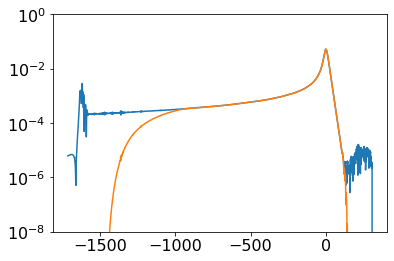

simname: q4a08t30dPm5p5dRm47_T_96_360
filename: data/q4a08t30dPm5p5dRm47_T_96_360.h5
eta: 0.16000039999600005
X1: [-2.89552616e-07  4.02310255e-01  6.91458282e-01]


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


X2: [0. 0. 0.]
chip: 0.4023102546808762
estimated remnant from fits:
final mass: 0.961838
assuming non-precessing:
(non-prec) final spin: 0.821571
(non-prec) ringdown freq: 0.099398
(non-prec) ringdown damp: 0.012244
estimated using PhenomP final spin:
(prec) final spin: 0.860973
(prec) ringdown freq: 0.104589
(prec) ringdown damp: 0.011618


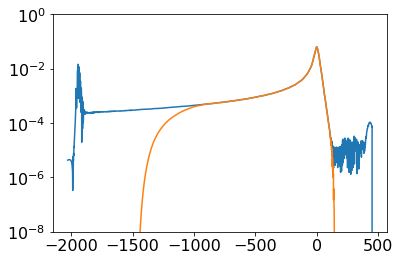

simname: q1a08t30dPm25_T_96_408
filename: data/q1a08t30dPm25_T_96_408.h5
eta: 0.25
X1: [-7.01069814e-08  4.00333588e-01  6.92595133e-01]
X2: [0. 0. 0.]
chip: 0.40033358786113504
estimated remnant from fits:
final mass: 0.939836
assuming non-precessing:
(non-prec) final spin: 0.789043
(non-prec) ringdown freq: 0.098066
(non-prec) ringdown damp: 0.012932
estimated using PhenomP final spin:
(prec) final spin: 0.795365
(prec) ringdown freq: 0.098735
(prec) ringdown damp: 0.012861


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


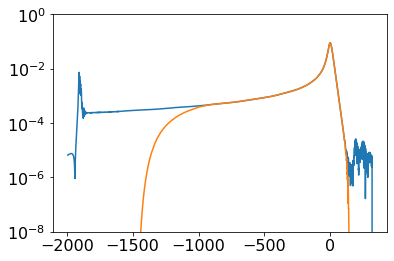

simname: q2_a10_a28_ph0_th60
filename: data/q2_a10_a28_ph0_th60.h5
eta: 0.22222311110000012
X1: [-1.44273611e-07 -6.93837822e-01  3.98187253e-01]
X2: [0. 0. 0.]
chip: 0.6938378224049954
estimated remnant from fits:
final mass: 0.9524
assuming non-precessing:
(non-prec) final spin: 0.74298
(non-prec) ringdown freq: 0.092438
(non-prec) ringdown damp: 0.013193
estimated using PhenomP final spin:
(prec) final spin: 0.804432
(prec) ringdown freq: 0.098413
(prec) ringdown damp: 0.012586


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


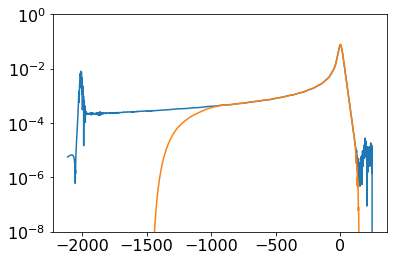

simname: q8a08t120dP2_r03_T_96_360
filename: data/q8a08t120dP2_r03_T_96_360.h5
eta: 0.09876544444344446
X1: [ 8.10327490e-07  6.89199969e-01 -4.06177973e-01]
X2: [0. 0. 0.]
chip: 0.689199968918657
estimated remnant from fits:
final mass: 0.991433
assuming non-precessing:
(non-prec) final spin: 0.008387
(non-prec) ringdown freq: 0.060156
(non-prec) ringdown damp: 0.014278
estimated using PhenomP final spin:
(prec) final spin: 0.544618
(prec) ringdown freq: 0.076515
(prec) ringdown damp: 0.013629


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


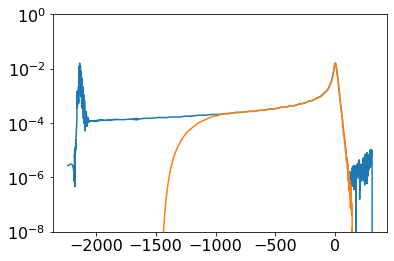

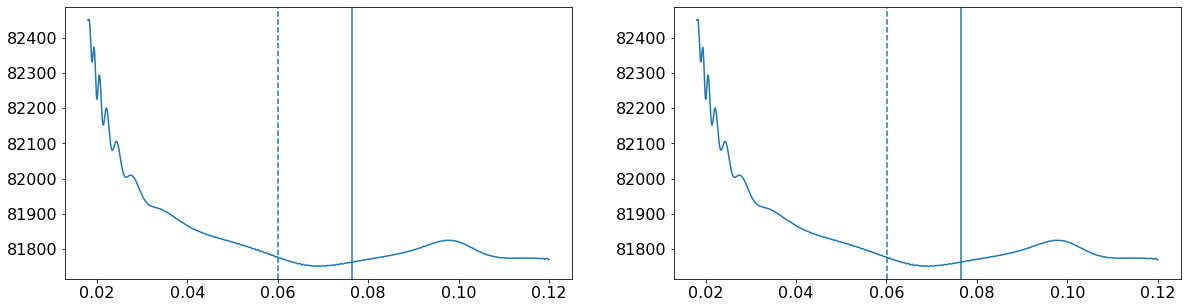

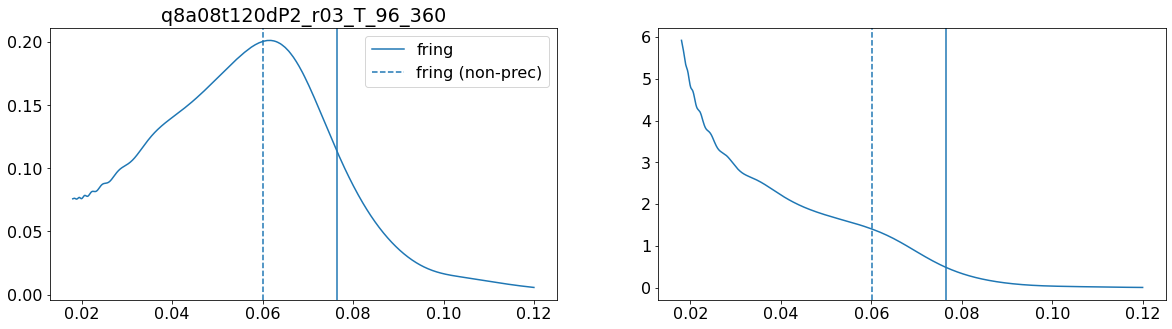

simname: q2a04t60dPm1_T_96_408
filename: data/q2a04t60dPm1_T_96_408.h5
eta: 0.22222277777233335
X1: [ 4.42193761e-08 -3.46713912e-01  1.99456752e-01]
X2: [0. 0. 0.]
chip: 0.3467139124043763
estimated remnant from fits:
final mass: 0.957312
assuming non-precessing:
(non-prec) final spin: 0.684244
(non-prec) ringdown freq: 0.087409
(non-prec) ringdown damp: 0.013527
estimated using PhenomP final spin:
(prec) final spin: 0.701381
(prec) ringdown freq: 0.088648
(prec) ringdown damp: 0.013423


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


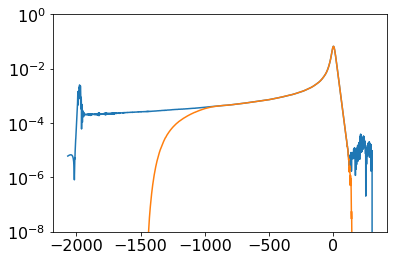

simname: q4a08t120dP1_T_96_360
filename: data/q4a08t120dP1_T_96_360.h5
eta: 0.16000039999600005
X1: [ 5.25532693e-08  6.90253056e-01 -4.04374583e-01]
X2: [0. 0. 0.]
chip: 0.6902530560657482
estimated remnant from fits:
final mass: 0.981827
assuming non-precessing:
(non-prec) final spin: 0.253926
(non-prec) ringdown freq: 0.066656
(non-prec) ringdown damp: 0.014269
estimated using PhenomP final spin:
(prec) final spin: 0.50954
(prec) ringdown freq: 0.075653
(prec) ringdown damp: 0.013858


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


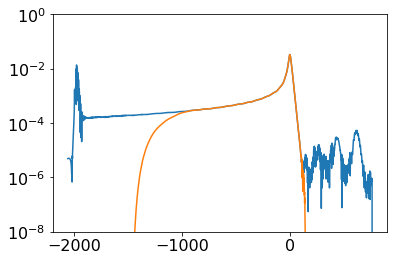

simname: q1a08t150dP0_T_96_408
filename: data/q1a08t150dP0_T_96_408.h5
eta: 0.25
X1: [-2.06950287e-07 -3.99394022e-01 -6.93136390e-01]
X2: [0. 0. 0.]
chip: 0.39939402168586924
estimated remnant from fits:
final mass: 0.959433
assuming non-precessing:
(non-prec) final spin: 0.577209
(non-prec) ringdown freq: 0.08072
(non-prec) ringdown damp: 0.013978
estimated using PhenomP final spin:
(prec) final spin: 0.585782
(prec) ringdown freq: 0.081176
(prec) ringdown damp: 0.013948


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


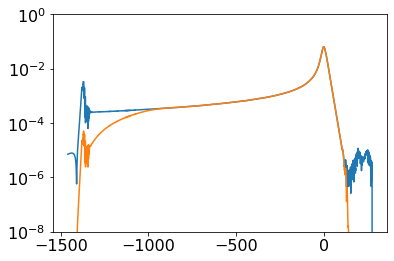

simname: q1a08t60dPm1.5_T_96_408
filename: data/q1a08t60dPm1.5_T_96_408.h5
eta: 0.25
X1: [1.10867997e-07 6.93079049e-01 3.99492439e-01]
X2: [0. 0. 0.]
chip: 0.6930790489296897
estimated remnant from fits:
final mass: 0.945477
assuming non-precessing:
(non-prec) final spin: 0.746586
(non-prec) ringdown freq: 0.093429
(non-prec) ringdown damp: 0.01326
estimated using PhenomP final spin:
(prec) final spin: 0.766429
(prec) ringdown freq: 0.095238
(prec) ringdown damp: 0.013084


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


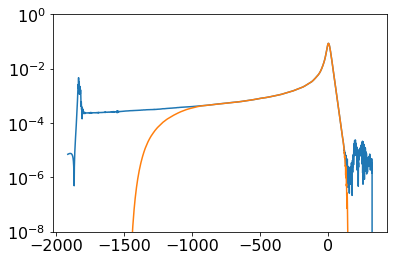

simname: q8a08t30dPm9.35_r0.5_T_96_360
filename: data/q8a08t30dPm9.35_r0.5_T_96_360.h5
eta: 0.09876544444344446
X1: [-4.24080630e-08  4.03677648e-01  6.90667389e-01]
X2: [0. 0. 0.]
chip: 0.4036776484743051
estimated remnant from fits:
final mass: 0.980352
assuming non-precessing:
(non-prec) final spin: 0.792923
(non-prec) ringdown freq: 0.094405
(non-prec) ringdown damp: 0.012356
estimated using PhenomP final spin:
(prec) final spin: 0.854669
(prec) ringdown freq: 0.101721
(prec) ringdown damp: 0.011511


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


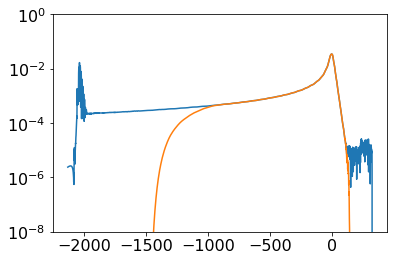

simname: q8a04t90dP0_T_96_360
filename: data/q8a04t90dP0_T_96_360.h5
eta: 0.09876538271585186
X1: [ 4.53619975e-09 -3.99991653e-01 -2.13044237e-03]
X2: [0. 0. 0.]
chip: 0.399991653178528
estimated remnant from fits:
final mass: 0.989425
assuming non-precessing:
(non-prec) final spin: 0.305446
(non-prec) ringdown freq: 0.067648
(non-prec) ringdown damp: 0.014106
estimated using PhenomP final spin:
(prec) final spin: 0.439523
(prec) ringdown freq: 0.072207
(prec) ringdown damp: 0.013906


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


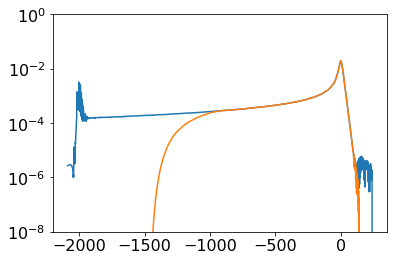

simname: q1a04t90_dP0_T_96_552
filename: data/q1a04t90_dP0_T_96_552.h5
eta: 0.25
X1: [-6.27880025e-10  3.99990400e-01 -2.86570081e-04]
X2: [0. 0. 0.]
chip: 0.39999040017279736
estimated remnant from fits:
final mass: 0.951616
assuming non-precessing:
(non-prec) final spin: 0.686373
(non-prec) ringdown freq: 0.088083
(non-prec) ringdown damp: 0.013596
estimated using PhenomP final spin:
(prec) final spin: 0.693619
(prec) ringdown freq: 0.088606
(prec) ringdown damp: 0.013552


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


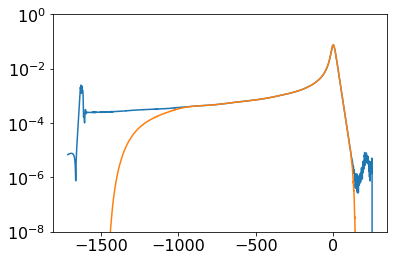

simname: q8a08t60Ditm45dr075_96_360
filename: data/q8a08t60Ditm45dr075_96_360.h5
eta: 0.09876620987653086
X1: [-3.77818040e-07  6.96538532e-01  3.93466877e-01]
X2: [0. 0. 0.]
chip: 0.696538531937366
estimated remnant from fits:
final mass: 0.985835
assuming non-precessing:
(non-prec) final spin: 0.593158
(non-prec) ringdown freq: 0.079392
(non-prec) ringdown damp: 0.013548
estimated using PhenomP final spin:
(prec) final spin: 0.809149
(prec) ringdown freq: 0.095584
(prec) ringdown damp: 0.012103


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


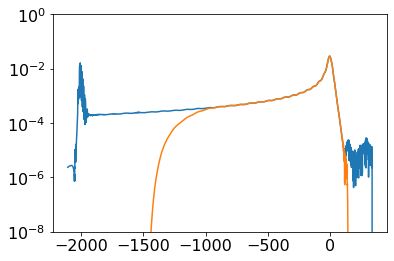

simname: q8a04t30dPm3_T_96_360
filename: data/q8a04t30dPm3_T_96_360.h5
eta: 0.09876538271585186
X1: [-3.62843749e-08  2.00924156e-01  3.45872030e-01]
X2: [0. 0. 0.]
chip: 0.20092415602844974
estimated remnant from fits:
final mass: 0.986415
assuming non-precessing:
(non-prec) final spin: 0.559387
(non-prec) ringdown freq: 0.077618
(non-prec) ringdown damp: 0.013654
estimated using PhenomP final spin:
(prec) final spin: 0.581478
(prec) ringdown freq: 0.078732
(prec) ringdown damp: 0.013582


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


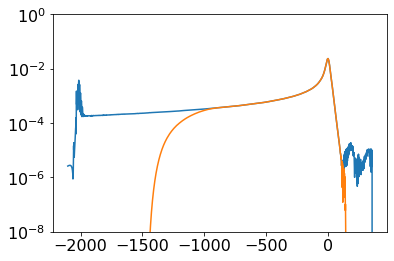

simname: q8a04t120dPp1_T_96_360
filename: data/q8a04t120dPp1_T_96_360.h5
eta: 0.09876538271585186
X1: [-1.04145364e-07  3.45494222e-01 -2.01572715e-01]
X2: [0. 0. 0.]
chip: 0.34549422216122827
estimated remnant from fits:
final mass: 0.990546
assuming non-precessing:
(non-prec) final spin: 0.158231
(non-prec) ringdown freq: 0.06356
(non-prec) ringdown damp: 0.014219
estimated using PhenomP final spin:
(prec) final spin: 0.315526
(prec) ringdown freq: 0.06788
(prec) ringdown damp: 0.014078


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


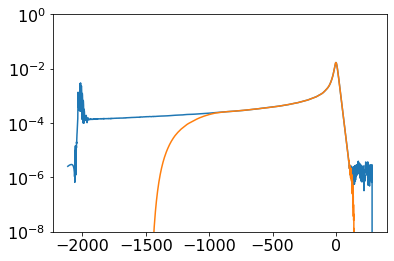

simname: q4a04t150_T_96_360
filename: data/q4a04t150_T_96_360.h5
eta: 0.160000199999
X1: [ 7.45402432e-08  1.99366258e-01 -3.46769916e-01]
X2: [0. 0. 0.]
chip: 0.19936625791400228
estimated remnant from fits:
final mass: 0.981375
assuming non-precessing:
(non-prec) final spin: 0.284908
(non-prec) ringdown freq: 0.067584
(non-prec) ringdown damp: 0.014244
estimated using PhenomP final spin:
(prec) final spin: 0.312174
(prec) ringdown freq: 0.06841
(prec) ringdown damp: 0.014213


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


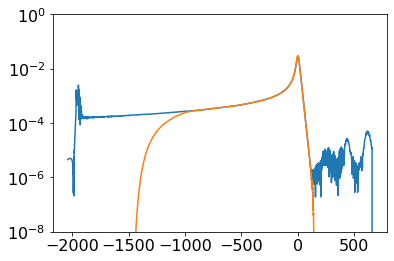

simname: q4a04t30_T_96_360
filename: data/q4a04t30_T_96_360.h5
eta: 0.160000199999
X1: [ 1.31202687e-07 -2.00613117e-01  3.46049813e-01]
X2: [0. 0. 0.]
chip: 0.20061311732823986
estimated remnant from fits:
final mass: 0.972328
assuming non-precessing:
(non-prec) final spin: 0.653596
(non-prec) ringdown freq: 0.084028
(non-prec) ringdown damp: 0.01348
estimated using PhenomP final spin:
(prec) final spin: 0.666087
(prec) ringdown freq: 0.084834
(prec) ringdown damp: 0.013417


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


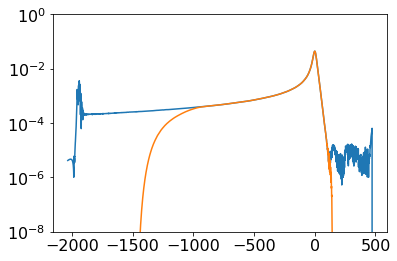

simname: q1a04t60_dPm1_T_96_552
filename: data/q1a04t60_dPm1_T_96_552.h5
eta: 0.25
X1: [-2.60912717e-08 -3.46425286e-01  1.99954707e-01]
X2: [0. 0. 0.]
chip: 0.34642528574325804
estimated remnant from fits:
final mass: 0.948731
assuming non-precessing:
(non-prec) final spin: 0.716831
(non-prec) ringdown freq: 0.090638
(non-prec) ringdown damp: 0.013441
estimated using PhenomP final spin:
(prec) final spin: 0.722044
(prec) ringdown freq: 0.091052
(prec) ringdown damp: 0.013404


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


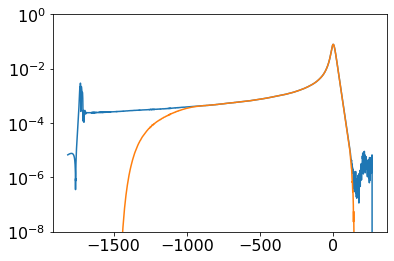

simname: q2_a10_a28_ph0_th150
filename: data/q2_a10_a28_ph0_th150.h5
eta: 0.22222311110000012
X1: [ 3.57372262e-08 -3.98353596e-01 -6.93742000e-01]
X2: [0. 0. 0.]
chip: 0.39835359602123566
estimated remnant from fits:
final mass: 0.970295
assuming non-precessing:
(non-prec) final spin: 0.40427
(non-prec) ringdown freq: 0.072301
(non-prec) ringdown damp: 0.014244
estimated using PhenomP final spin:
(prec) final spin: 0.441338
(prec) ringdown freq: 0.073701
(prec) ringdown damp: 0.014176


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


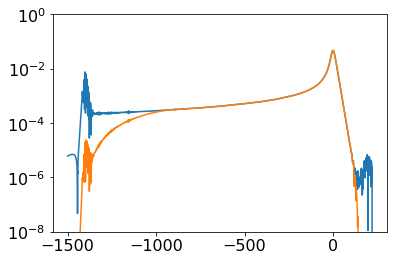

simname: q1a04t150_dP0_T_96_552
filename: data/q1a04t150_dP0_T_96_552.h5
eta: 0.25
X1: [-4.40908208e-09  1.99916402e-01 -3.46447361e-01]
X2: [0. 0. 0.]
chip: 0.1999164019775647
estimated remnant from fits:
final mass: 0.95588
assuming non-precessing:
(non-prec) final spin: 0.6325
(non-prec) ringdown freq: 0.084153
(non-prec) ringdown damp: 0.013812
estimated using PhenomP final spin:
(prec) final spin: 0.634472
(prec) ringdown freq: 0.084274
(prec) ringdown damp: 0.013803


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


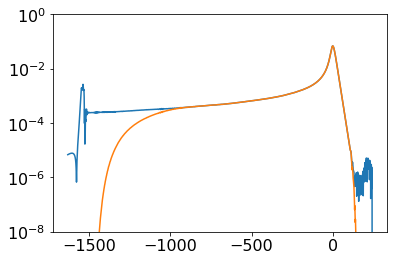

simname: q1a04t30_dPm2_T_96_552
filename: data/q1a04t30_dPm2_T_96_552.h5
eta: 0.25
X1: [-8.30632142e-09 -2.00021999e-01  3.46386162e-01]
X2: [0. 0. 0.]
chip: 0.20002199944321042
estimated remnant from fits:
final mass: 0.946385
assuming non-precessing:
(non-prec) final spin: 0.738729
(non-prec) ringdown freq: 0.09266
(non-prec) ringdown damp: 0.013311
estimated using PhenomP final spin:
(prec) final spin: 0.74042
(prec) ringdown freq: 0.092805
(prec) ringdown damp: 0.013298


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


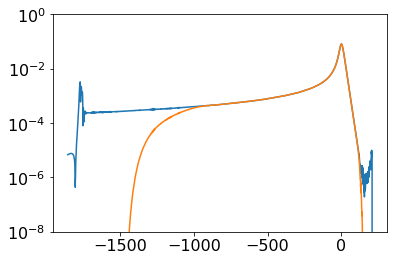

simname: q1a08t120dP0_T_96_408
filename: data/q1a08t120dP0_T_96_408.h5
eta: 0.25
X1: [-5.71369777e-09  6.92383074e-01 -4.00699893e-01]
X2: [0. 0. 0.]
chip: 0.6923830739850044
estimated remnant from fits:
final mass: 0.956479
assuming non-precessing:
(non-prec) final spin: 0.623931
(non-prec) ringdown freq: 0.083586
(non-prec) ringdown damp: 0.013841
estimated using PhenomP final spin:
(prec) final spin: 0.647497
(prec) ringdown freq: 0.085031
(prec) ringdown damp: 0.013734


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


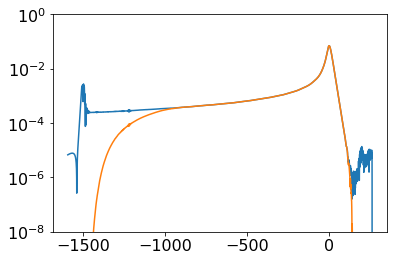

simname: q8a08t150dP2_T_120_480
filename: data/q8a08t150dP2_T_120_480.h5
eta: 0.09876544444344446
X1: [-9.84770606e-08 -3.96532060e-01 -6.94794516e-01]
X2: [0. 0. 0.]
chip: 0.39653206013189735
estimated remnant from fits:
final mass: 0.992384
assuming non-precessing:
(non-prec) final spin: -0.199677
(non-prec) ringdown freq: 0.056306
(non-prec) ringdown damp: 0.014303
estimated using PhenomP final spin:
(prec) final spin: -0.371529
(prec) ringdown freq: 0.053711
(prec) ringdown damp: 0.014298


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


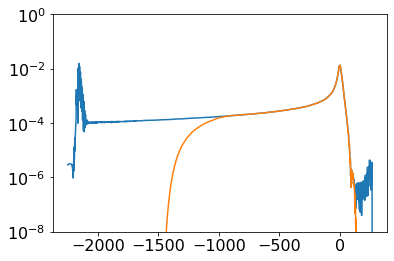

simname: q1a08t90dPm1_T_96_408
filename: data/q1a08t90dPm1_T_96_408.h5
eta: 0.25
X1: [ 5.96745758e-10  7.99971201e-01 -9.85709508e-04]
X2: [0. 0. 0.]
chip: 0.7999712007775813
estimated remnant from fits:
final mass: 0.951625
assuming non-precessing:
(non-prec) final spin: 0.686266
(non-prec) ringdown freq: 0.088075
(non-prec) ringdown damp: 0.013596
estimated using PhenomP final spin:
(prec) final spin: 0.714813
(prec) ringdown freq: 0.090204
(prec) ringdown damp: 0.013414


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


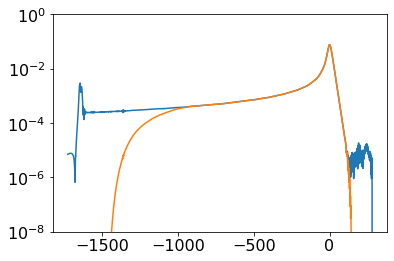

simname: q4a08t150_T_96_360
filename: data/q4a08t150_T_96_360.h5
eta: 0.16000227999963998
X1: [-3.05147608e-07 -3.97414496e-01 -6.94286533e-01]
X2: [0. 0. 0.]
chip: 0.39741449562366793
estimated remnant from fits:
final mass: 0.983736
assuming non-precessing:
(non-prec) final spin: 0.098646
(non-prec) ringdown freq: 0.062583
(non-prec) ringdown damp: 0.014352
estimated using PhenomP final spin:
(prec) final spin: 0.272803
(prec) ringdown freq: 0.067067
(prec) ringdown damp: 0.014223


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


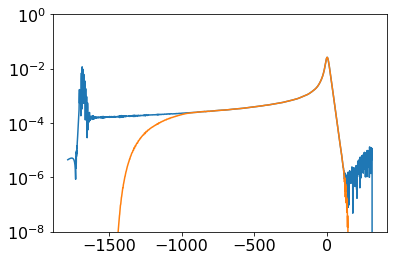

simname: q2_a10_a28_ph0_th90
filename: data/q2_a10_a28_ph0_th90.h5
eta: 0.22222311110000012
X1: [-1.38568548e-09 -7.99971851e-01 -3.27515398e-03]
X2: [0. 0. 0.]
chip: 0.7999718506313878
estimated remnant from fits:
final mass: 0.961297
assuming non-precessing:
(non-prec) final spin: 0.622528
(non-prec) ringdown freq: 0.083084
(non-prec) ringdown damp: 0.013777
estimated using PhenomP final spin:
(prec) final spin: 0.716903
(prec) ringdown freq: 0.089459
(prec) ringdown damp: 0.013265


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


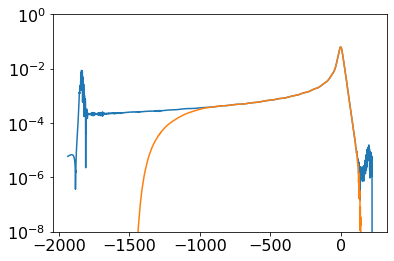

simname: q4a04t120dP0D_T_96_360
filename: data/q4a04t120dP0D_T_96_360.h5
eta: 0.160000199999
X1: [-1.77096775e-07 -3.45790990e-01 -2.01059664e-01]
X2: [0. 0. 0.]
chip: 0.3457909900991617
estimated remnant from fits:
final mass: 0.980094
assuming non-precessing:
(non-prec) final spin: 0.363385
(non-prec) ringdown freq: 0.070153
(non-prec) ringdown damp: 0.014165
estimated using PhenomP final spin:
(prec) final spin: 0.425471
(prec) ringdown freq: 0.07236
(prec) ringdown damp: 0.014064


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


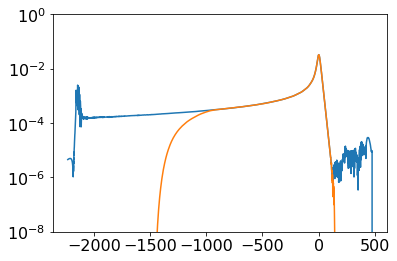

simname: q2a04t90dPm1_T_96_408
filename: data/q2a04t90dPm1_T_96_408.h5
eta: 0.22222277777233335
X1: [ 1.10160487e-10  3.99990650e-01 -8.15476107e-04]
X2: [0. 0. 0.]
chip: 0.3999906501415482
estimated remnant from fits:
final mass: 0.961254
assuming non-precessing:
(non-prec) final spin: 0.623285
(non-prec) ringdown freq: 0.083133
(non-prec) ringdown damp: 0.013775
estimated using PhenomP final spin:
(prec) final spin: 0.648142
(prec) ringdown freq: 0.084649
(prec) ringdown damp: 0.013662


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


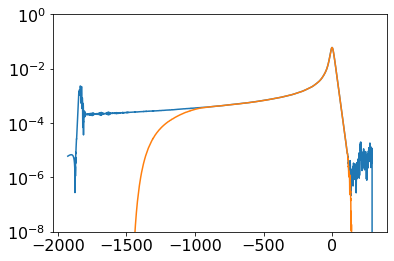

simname: q8a04t60D_dPm1
filename: data/q8a04t60D_dPm1.h5
eta: 0.09876538271585186
X1: [1.96077888e-07 3.47331897e-01 1.98388960e-01]
X2: [0. 0. 0.]
chip: 0.34733189679752297
estimated remnant from fits:
final mass: 0.98791
assuming non-precessing:
(non-prec) final spin: 0.452872
(non-prec) ringdown freq: 0.072834
(non-prec) ringdown damp: 0.013901
estimated using PhenomP final spin:
(prec) final spin: 0.529536
(prec) ringdown freq: 0.076085
(prec) ringdown damp: 0.01372


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


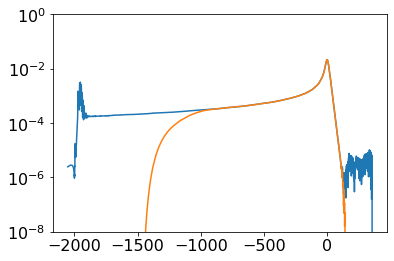

simname: q1a04t120_dP0_T_96_552
filename: data/q1a04t120_dP0_T_96_552.h5
eta: 0.25
X1: [ 3.42294159e-08 -3.46264890e-01 -2.00232179e-01]
X2: [0. 0. 0.]
chip: 0.3462648895927894
estimated remnant from fits:
final mass: 0.954178
assuming non-precessing:
(non-prec) final spin: 0.655431
(non-prec) ringdown freq: 0.085745
(non-prec) ringdown damp: 0.013728
estimated using PhenomP final spin:
(prec) final spin: 0.661123
(prec) ringdown freq: 0.086118
(prec) ringdown damp: 0.013699


/nfshome/store01/users/sebastian.khan/projects/eh-lal/compare-ns-co-prec/puck/sk/puck.py:29: RuntimeWarning: overflow encountered in exp
  tout.append(1./(np.exp((t2-t1)/(t-t1)+(t2-t1)/(t-t2))+1))


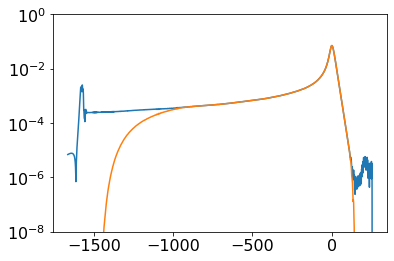

In [33]:
for simfile in simfiles:
    main(simfile)